In [1]:
import pandas as pd
import seaborn as sns
#from sklearn import set_config
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Configurações

seed = 42
#set_config(transform_output = "pandas")
sns.set_style("darkgrid")


# Load Data

In [3]:
nba       = pd.read_csv('../data/nba/nba_salaries.csv')
insurance = pd.read_csv('../data/insurance/insurance.csv')
airline   = pd.read_csv('../data/airline/train.csv')
airbnb    = pd.read_csv('../data/airbnb/listings.csv')

# Functions

In [4]:
def univariate_statistics(df: pd.DataFrame, round_to: int = 3) -> pd.DataFrame:
    '''
    Function to calculate import statistis for univariate analysis

    Args:
        df (pd.DataFrame): input data
            round (int) : number of decimals to be returned
    Returns
        output_df: pd.DataFrame containing the calculated statistics. The features will be the index
            of the dataframe and the statitics the columns.
            The univariate statistics in the output dataframe are the following:
                            
            type  : datatype of the feature
            count  : number of not nan values
            missing : number of missing values
            unique : number of unique values
            mode : most frequent value
            min_value : min value   
            q1 : first quartile
            median : median
            q3 : third quartile
            max_value : max value
            mean : mean value
            std : standard deviation
            skew : skew
            kurtosis : kurtosis 
    '''


    output_df = pd.DataFrame(columns = ['feature','type', 'count', 'missing', 
                                        'unique', 'mode', 'min_value', 'q1',
                                        'median', 'q3', 'max_value', 'mean', 'std',
                                        'skew', 'kurtosis'])
    output_df.set_index('feature', inplace = True)

    for col in df.columns :
        # metrics that be calculated for all data types
        dtype = df[col].dtype
        count = df[col].count()
        missing = df[col].isna().sum()
        unique = df[col].nunique()
        mode_series = df[col].mode()
        mode = mode_series[0] if not mode_series.empty else '-'

        if pd.api.types.is_numeric_dtype(df[col]):
            # metrics that only apply to numeric columns
            min_value = df[col].min().round(round_to)
            q_1 = df[col].quantile(0.25)
            median = df[col].median()
            q_3 = df[col].quantile(0.75)
            max_value = df[col].max()
            mean_ = df[col].mean().round(round_to)
            std_ = df[col].std().round(round_to)
            skew = df[col].skew().round(round_to)
            kurtosis = df[col].kurtosis().round(round_to)

        else:
            min_value = '-'
            q_1 = '-'
            median = '-'
            q_3 = '-'
            max_value = '-'
            mean_ = '-'
            std_ = '-'
            skew = '-'
            kurtosis = '-'   

        output_df.loc[col] = [dtype, count, missing, unique,
                              mode, min_value, q_1, median, q_3, max_value,        
                              mean_, std_, skew, kurtosis]

    return output_df



      

In [5]:
def plot_histograms_countplots(df: pd.DataFrame, list_of_features: list = None) -> None:   

    '''
    The function plots histogram for numeric features and countplots for categorical features.

    Args:
        df (pd.DataFrame): data to be plotted
        list_of_feature: features to be plotted. If None, all numerical and categorical features in df will 
                         be plotted
    '''

    if list_of_features is None:
        list_of_features = df.columns


    for col in list_of_features:
        if col not in df:
            print(f'The feature {col} was not in df and was therefore ignored')
            continue
        if pd.api.types.is_numeric_dtype(df[col]):
            plt.title(col)
            sns.histplot(df[col], stat = 'density')
        else:
            plt.title(col)
            sns.countplot(data = df, x = df[col])
            if df[col].nunique() > 10:
                plt.xticks(rotation = 90)
        plt.show()

# Example

In [10]:
nba_univariate_statistics = univariate_statistics(nba)
print(nba_univariate_statistics.head())

               type  count  missing  unique        mode min_value         q1  \
feature                                                                        
Unnamed: 0    int64    467        0     467           0         0      116.5   
Player Name  object    467        0     467  AJ Griffin         -          -   
Salary        int64    467        0     354      508891      5849  1782621.0   
Position     object    467        0       9          SG         -          -   
Age           int64    467        0      22          23        19       23.0   

                median          q3 max_value         mean           std  \
feature                                                                   
Unnamed: 0       233.0       349.5       466        233.0       134.956   
Player Name          -           -         -            -             -   
Salary       3722040.0  10633543.5  48070014  8416598.747  10708118.047   
Position             -           -         -            -       

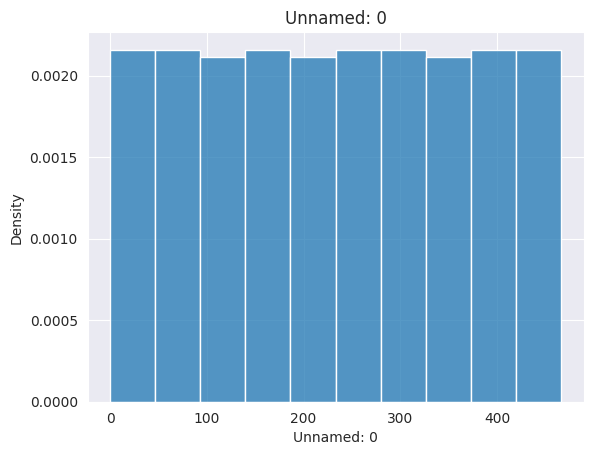

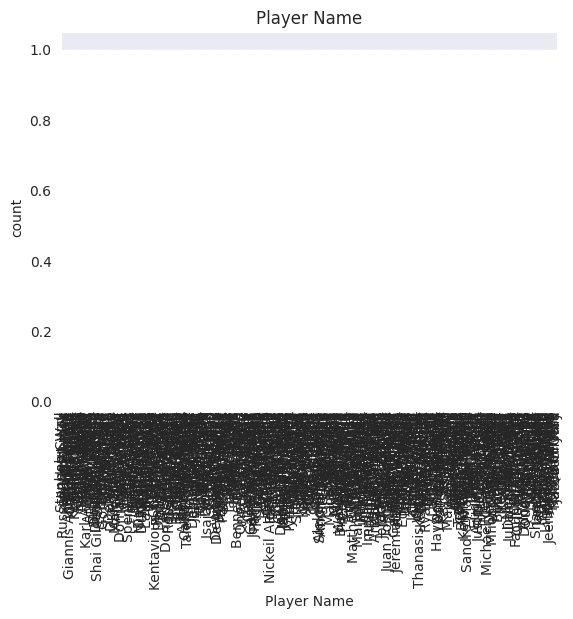

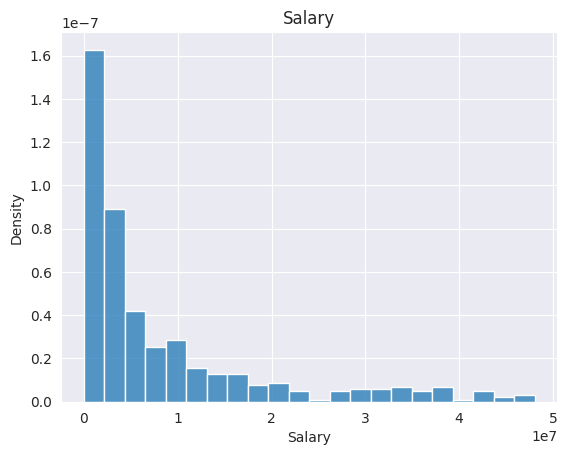

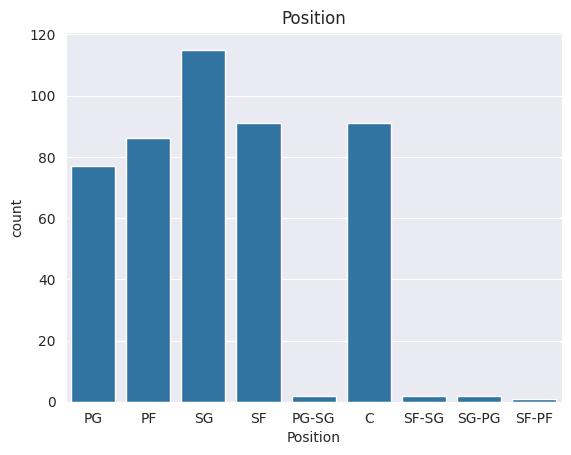

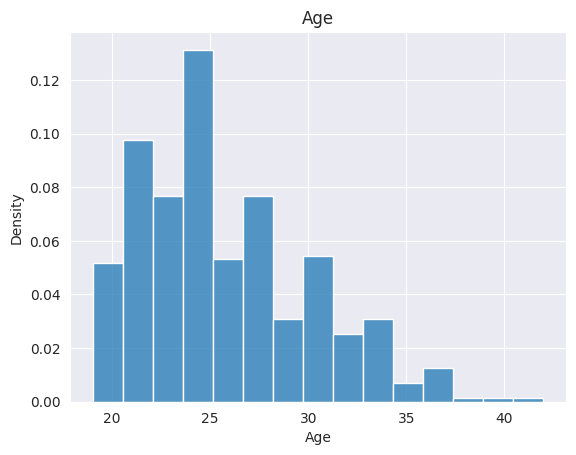

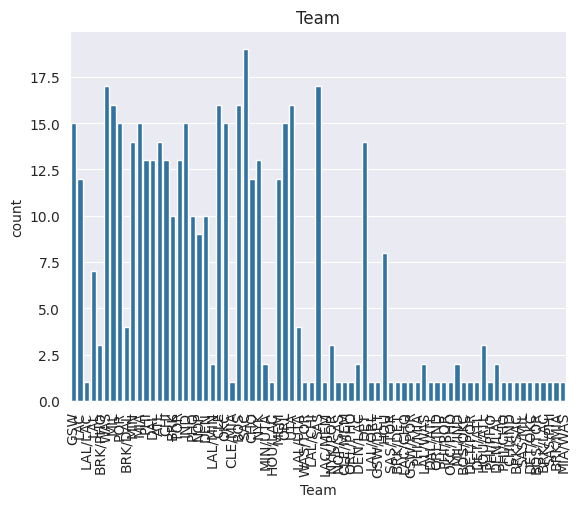

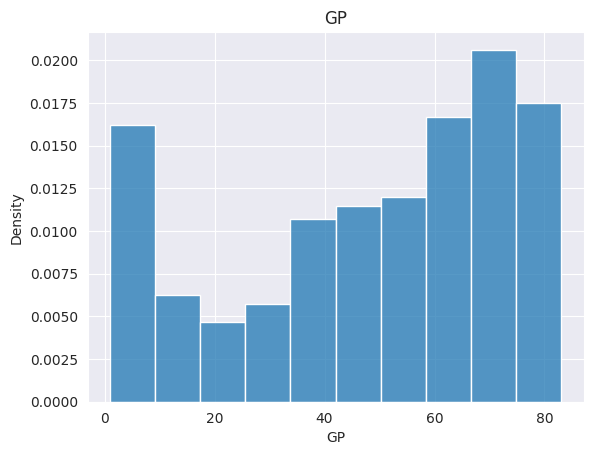

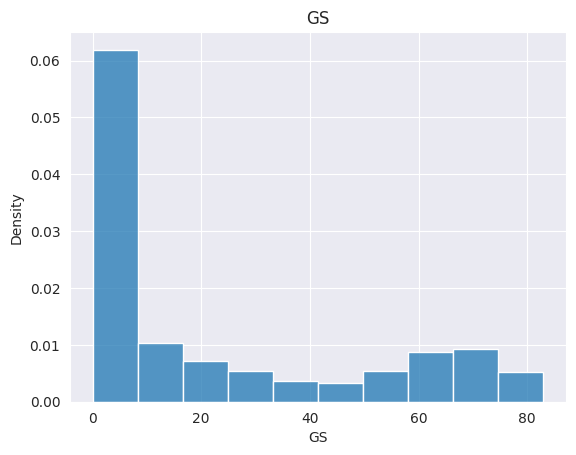

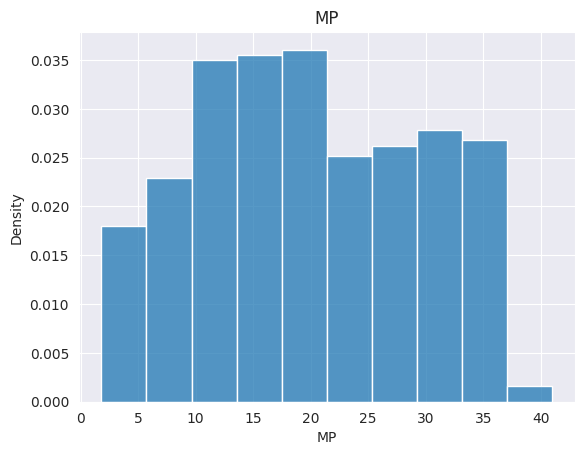

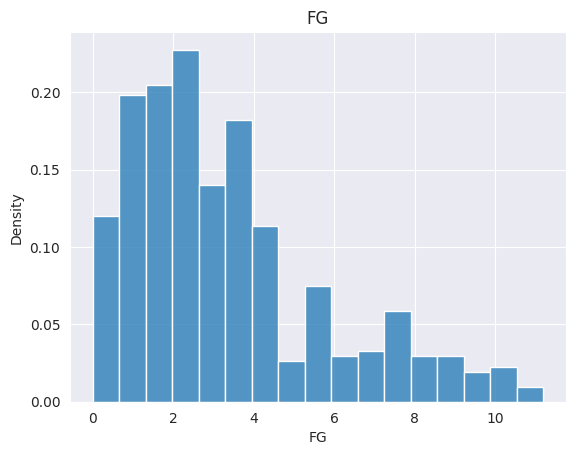

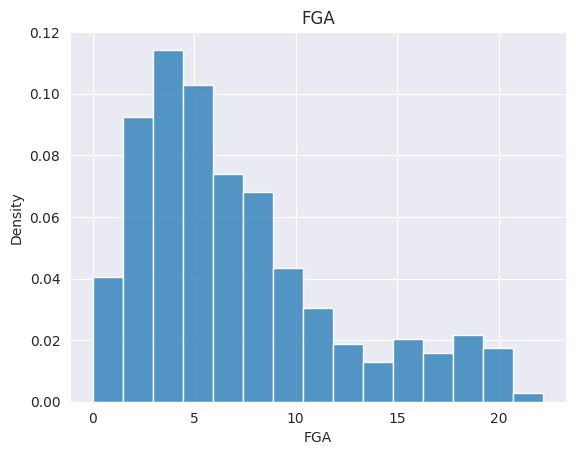

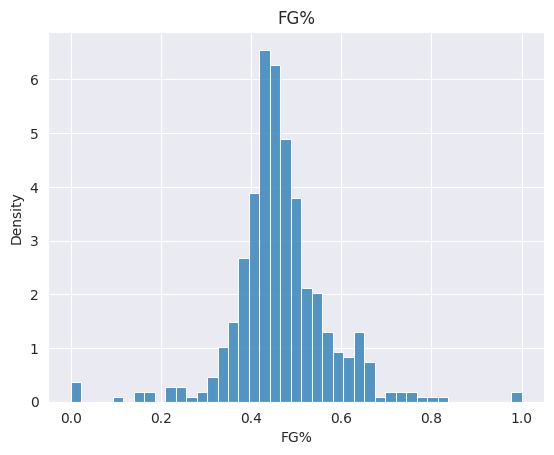

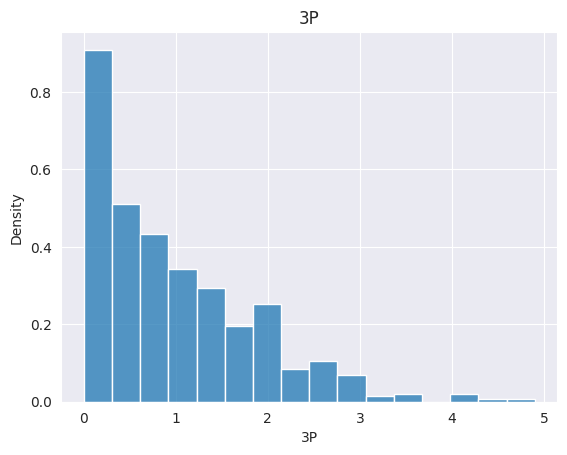

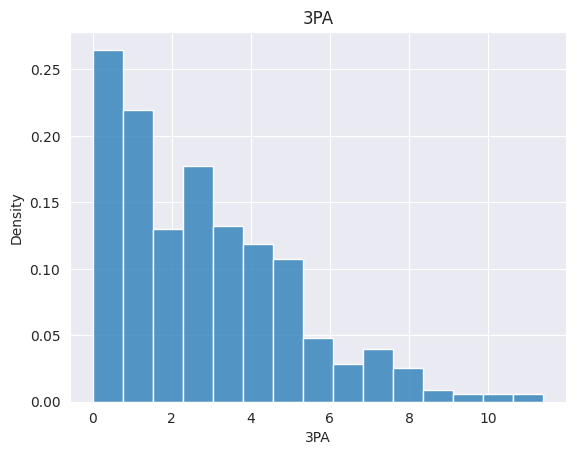

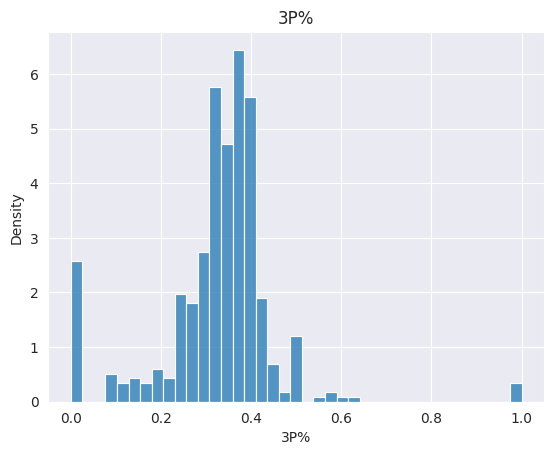

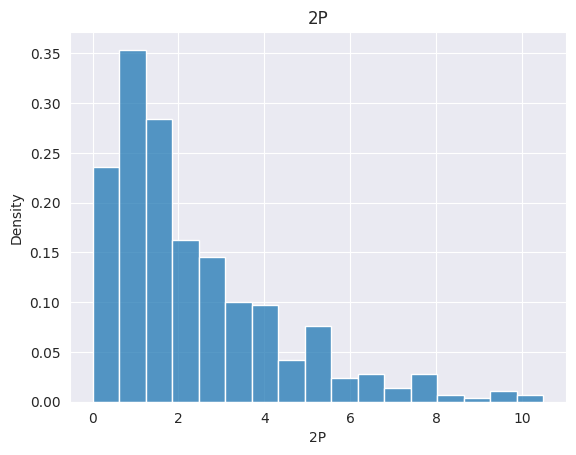

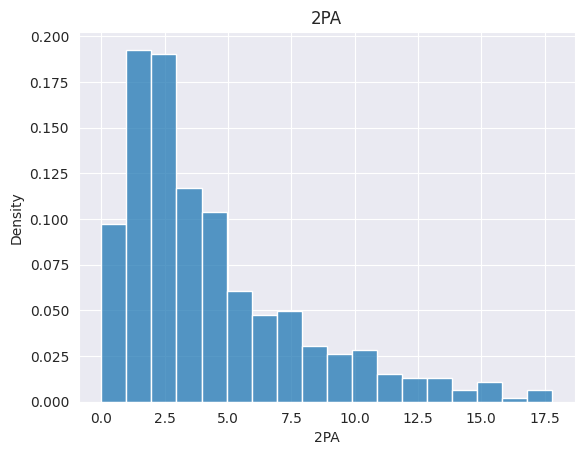

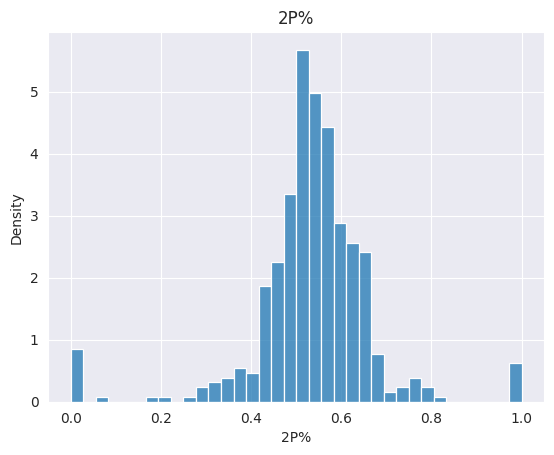

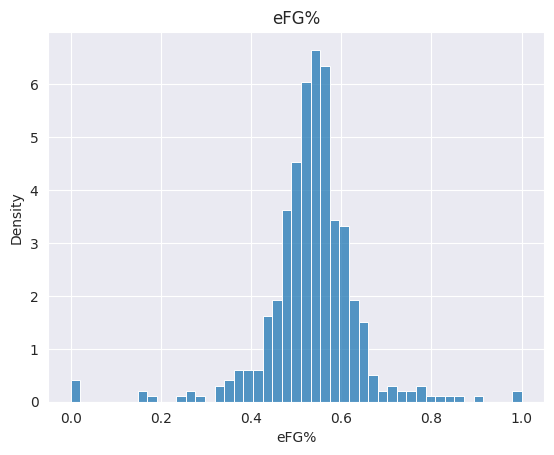

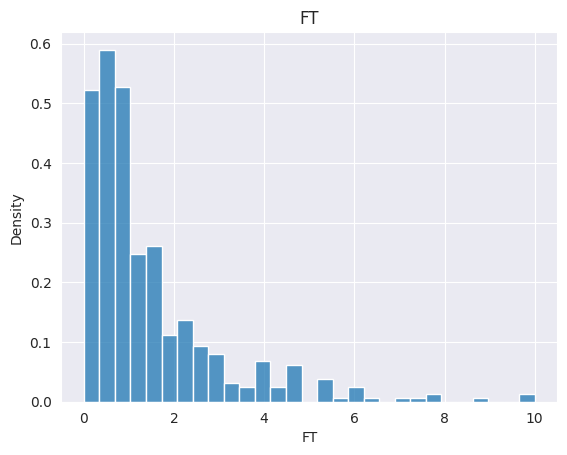

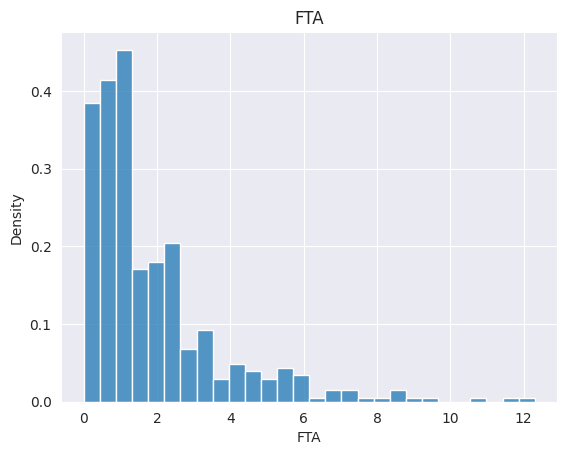

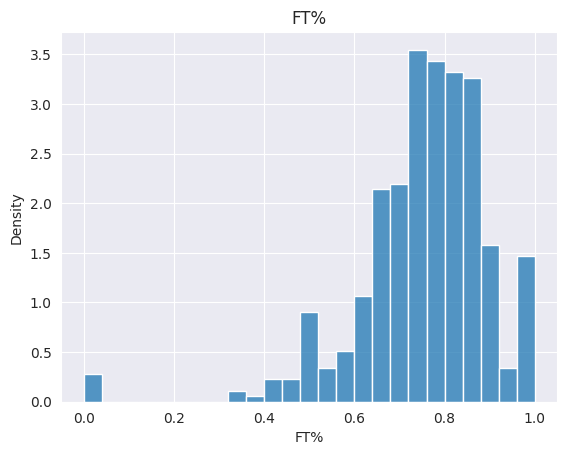

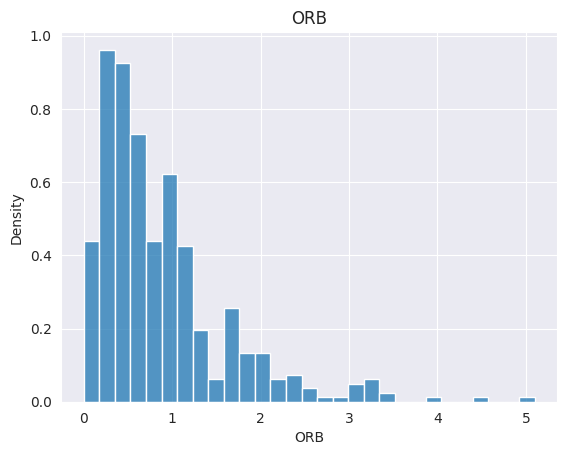

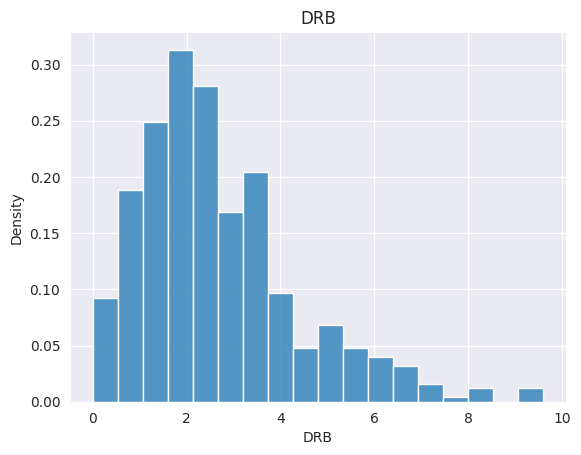

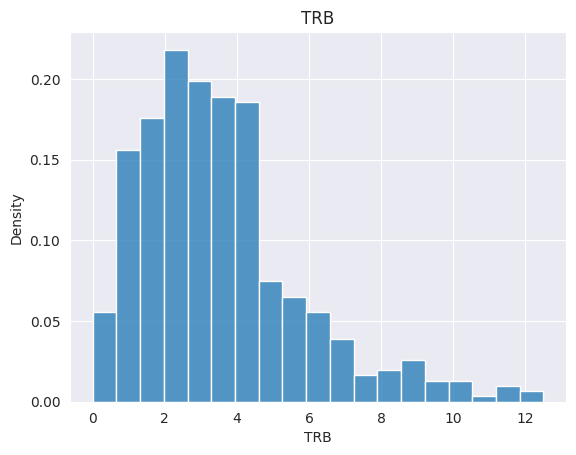

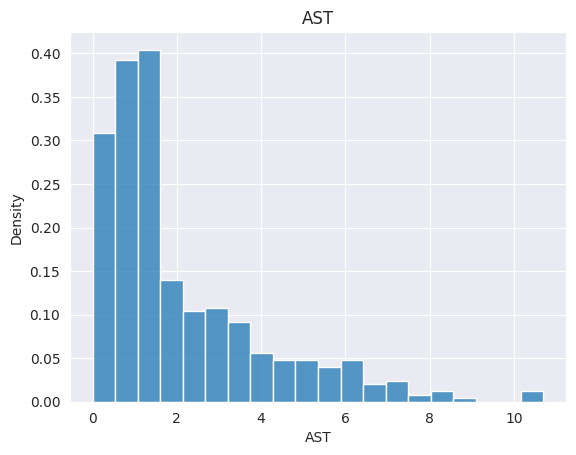

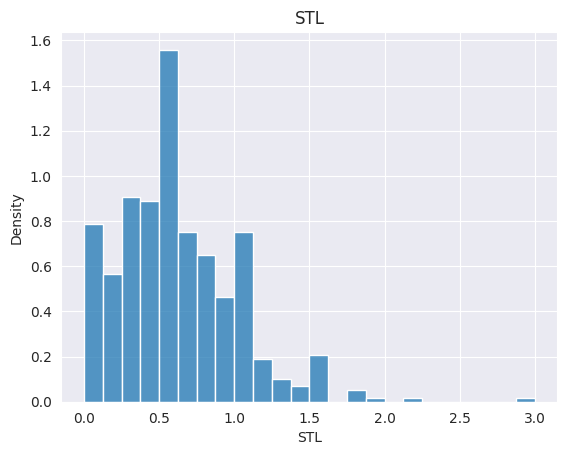

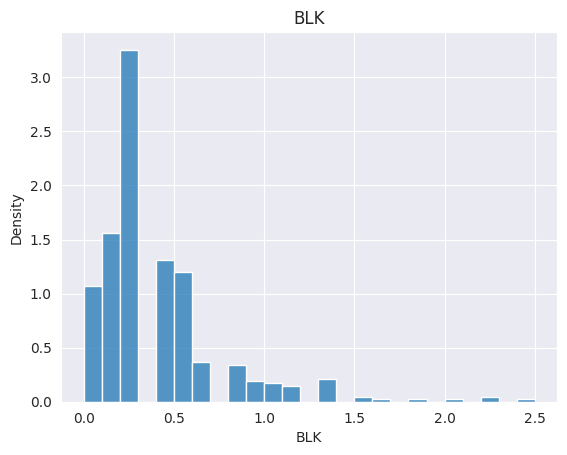

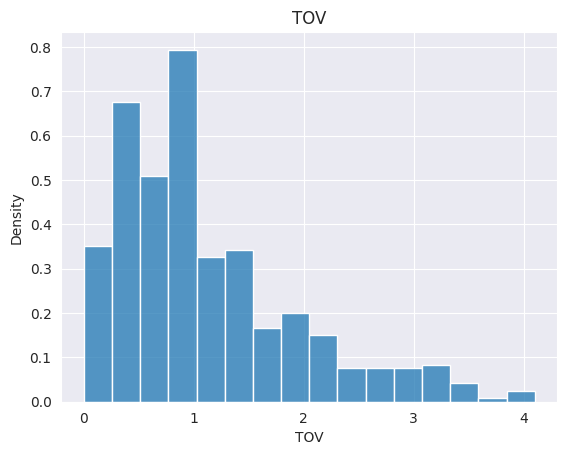

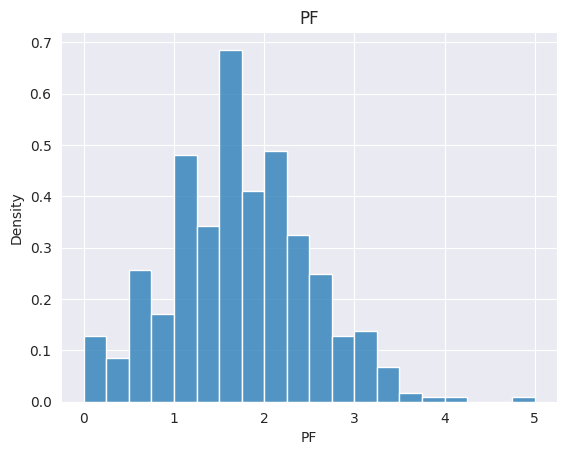

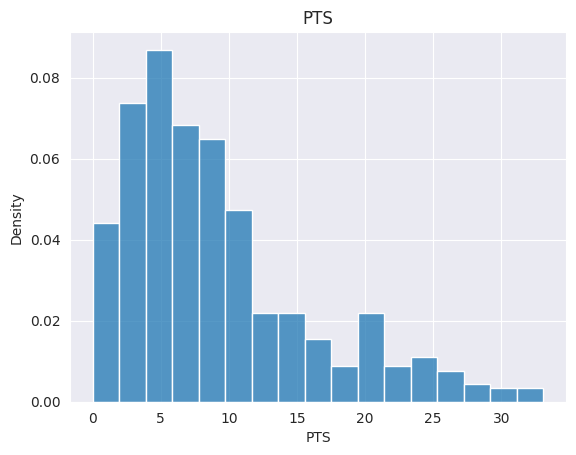

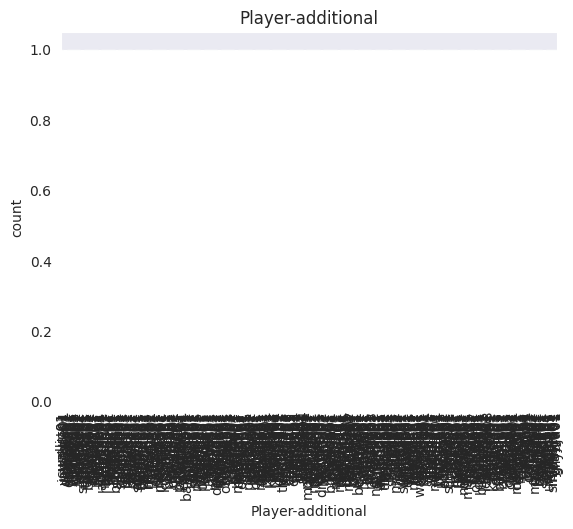

In [12]:
#plot all features in the nba dataframe
for feature in nba.columns:
    plot_histograms_countplots(nba, [feature])